# Conducting Genetic Evaluations using Mixed Models 

In this module we will cover the basics of analyzing plant breeding data using mixed models for the purpose of calculating the genetic merit of lines for use as parents commonly referred to as **Estimated Breeding Values (EBV) or Genomic Estimated Breeding Values (GEBV)**. We will only cover 2 examples, but the course will provide some basic information on the sommer package and how to run the analysis using the ILCI JupyterHub Environment. Mixed models are powerful tools for the analysis of breeding data because they can incorporate knowledge of genetic inheritance and genetic control of complex traits, leading to more accurate estimates of genetic merit.

**Specifically this module will provide:**

- A brief review of inheritance, basic principles of quantitative genetics, and response to selection.
- An introduction the the mixed model package sommer and instructions on how to fit and interpret results from the sommer package.
- Two examples of fitting mixed models using pedigree and genomic relationship matrices.



# Inheritance

![](images/Meiosis.png)

 1.  **Law of segregation**: A trait is influenced by a pair of alleles but each individual passes on to       its progeny a gamete that contains only a single, random, allele.

2.  **Law of independent assortment**: Alleles of different factors combine independently in the gamete.

# Inheritance of alleles is random and conditional on the genotype of parents
- As a result inheritance follows well defined discrete statistical probability distributions
- This combined with the properties of the central limit theorem enable us to treat most complex genetic (influenced by multiple genetic and environmental factors) effects as being normally distributed.
- The fact that complex genetic effects tend to follow normal distributions means statistical approaches play a critical role in plant breeding efforts.
- **Quantitative Genetics** is a field of science that specializes in developing and applying statistical modeling to better understand and more effectively modify complex genetic traits.


# Central Limit Theorem
CLT states the sum of a large number of independent identically distributed random variables with a finite variance will be approximately normal.

In this section, we demonstrate the Central Limit Theorem using a graphical approach. We generate a sample data set following an exponential distribution using the rexp function. The goal is to visualize the distribution of these data points.

We utilize the ggplot2 library for creating histograms. The geom_histogram function is used to create a histogram of the data, allowing us to observe the population distribution. Various aesthetic elements are added for clarity, including labeling the x-axis, setting a title, and customizing the theme for better visualization.

In [ ]:
# Central Limit Demo
library(ggplot2)
set.seed(100)
dat = rexp(10000)
#dat=runif(10000)
ggplot(data.frame(x=dat), aes(x=x)) +
  geom_histogram(aes(y = after_stat(density)), binwidth=.1 ) + xlab("x value") +
  ggtitle("Population Distribution") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank())

In this section, we demonstrate the concept of sampling distribution of the sample mean. We begin by setting a seed for reproducibility. Our goal is to understand how the means of samples, taken from our original dataset, distribute themselves.

We conduct a simulation where we repeatedly draw samples of size 30 from our dataset dat, compute their means, and store these means in an array. This process is repeated 1000 times to generate a robust sample of means.

After accumulating these sample means, we plot their distribution using ggplot2. The resulting histogram will help us observe the distribution of the sample means, which is a critical concept in understanding the Central Limit Theorem. The histogram is styled for better readability and aesthetics.

In [ ]:
set.seed(100)
samples <- c()
for(i in 1:1000){
  samples <- c(samples, mean(sample(dat, 30)))
}
ggplot(data.frame(x=samples), aes(x=x)) +
  geom_histogram(aes(y = after_stat(density)), binwidth=.05 ) + xlab("x value") +
  ggtitle("1000 Means of 30 from Population") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank())

# How many genes need to control a trait before the genetic effects follow a normal distribution?

This section focuses on simulating the genetic effects of quantitative trait loci (QTL) that control a particular trait of interest. We define the number of QTLs and simulate their effects on a population of 1000 lines.

**Initialization**: We start by specifying the number of QTLs (`nQTL`) influencing the trait.

In [ ]:
# number of quantitative trait loci controlling the trait of interest
nQTL=7

**Storage Vector**: A vector (`gEffects`) is initialized to store the cumulative effect of QTLs for each line.

In [ ]:
# allocating a vector to store the sum of QTL effects for 1000 lines
gEffects=rep(0,1000)

**QTL Effect Simulation**: The effects of each QTL are simulated using a uniform distribution. This represents the random nature of genetic variation.

In [ ]:
# simulating QTL effects using a uniform distribution (0,1)
QTLeffect=runif(nQTL)

**Sampling Genotypes**: We simulate bi-allelic polymorphisms for each line, assuming a high minor allele frequency. The genotype at each locus is determined by sampling, and the effect of each allele is added to or subtracted from the total genetic effect for each line.

In [ ]:
# Sampling bi-allelic polymorphisms for 10000 lines
# Assuming a high minor allele frequency of .4
# setting up a loop to sample genotypes 
for(i in c(1:1000)){
    for(j in c(1:nQTL)){
        # sample first allele at the jth locus
        if(runif(1)>.4){
            #adding allele effect for the ith line
            gEffects[i]=gEffects[i]+QTLeffect[j]
        } else {
            gEffects[i]=gEffects[i]-QTLeffect[j]
        }
            
        # sample second allele a jth locus
        if(runif(1)>.4){
            #adding allele effect for the ith line
            gEffects[i]=gEffects[i]+QTLeffect[j]
        } else {
            gEffects[i]=gEffects[i]-QTLeffect[j]
        }
    }
}

**Visualization**: Finally, we plot the distribution of genetic effects across the 1000 lines using `ggplot2`. This histogram provides insights into the variability of genetic contributions across different lines.

In [ ]:
ggplot(data.frame(x=gEffects), aes(x=x)) +
  geom_histogram(aes(y = after_stat(density)), binwidth=.2 ) + xlab("genetic value") +
  ggtitle("Distribution of genetics effects") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank())

# Activity:
Use the above code and modify the number of QTL controlling the trait of interest 'nQTL'. Approximately how many QTL need to be controlling the trait before the distribution on genetic values looks normal?

In [ ]:
# number of quantitative trait loci controlling the trait of interest
nQTL=5
# allocating a vector to store the sum of QTL effects for 1000 lines
gEffects=rep(0,1000)
# simulating QTL effects using a uniform distribution (0,1)
QTLeffect=runif(nQTL)
# Sampling bi-allelic polymorphisms for 10000 lines
# Assuming a high minor allele frequency of .4
# setting up a loop to sample genotypes 
for(i in c(1:1000)){
    for(j in c(1:nQTL)){
        # sample first allele at the jth locus
        if(runif(1)>.4){
            #adding allele effect for the ith line
            gEffects[i]=gEffects[i]+QTLeffect[j]
        } else {
            gEffects[i]=gEffects[i]-QTLeffect[j]
        }
            
        # sample second allele a jth locus
        if(runif(1)>.4){
            #adding allele effect for the ith line
            gEffects[i]=gEffects[i]+QTLeffect[j]
        } else {
            gEffects[i]=gEffects[i]-QTLeffect[j]
        }
    }
}
ggplot(data.frame(x=gEffects), aes(x=x)) +
  geom_histogram(aes(y = after_stat(density)), binwidth=.2 ) + xlab("genetic value") +
  ggtitle("Distribution of genetics effects") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank())

**Answer -**

# Moments of a statistical distribution.

The central moments of a statistical distribution represented by a **probability density function (PDF)** describe important attributes of the ditribution. In particular the first two central moments are important for mixed models and calculating expected response to selection (covered later).

The mean **$\mu$** is the first moment of the distribution and it provides information on the center of the distribution.

The variance **$\sigma^2$** is the second central moment and provides information on the spread of data points around the mean. 

# Linear Models

When we use the term "Linear Model" we are refering to a model in which the models effects are estimated as a linear function of the dependent variable - the **phenotype** in the case of plant breeding applications.

The dependent variable is often denoted as $y$

When deriving estimators for linear models there are certain properties that are desirable:

- **Best** - This means the estimator has the minimum error variance of all possible linear estimators.
- **Linear** - As previously mention, this mean the estimator is a linear function of of $y$. The mean is a simple example of a linear estimator as:
        $\bar{y}=\frac{\sum_{i=1}^{n} y_i}{n}$ 
- **Unbiased** - An estimator is unbiased when the expectation of the estimator is equal to the expectation of the true value. In other words, as the amount of information used to calculate the estimator increase, the error in the estimate decrease towards 0.

When using linear model software in R, the obtained estimates of model effects are the **Best Linear Unbiased Estimates** or **BLUE**. 

# Partitioning of Phenotypes

In Quantitative Genetics the basic linear model partitions observed phenotypes into genetic and environmental effects:

$P = G + E$

Assuming independence of genetic and environmental effects we can similarly partition phenotype vairance into:

$\sigma_{p}^2=\sigma_{g}^2+\sigma_{e}^2$

Similarly it is necessary to partition genetic variance into additive ($\sigma_{a}^2$), epistatic ($\sigma_{aa}^2$)  and dominance ($\sigma_{d}^2$)components.

$\sigma_{g}^2=\sigma_{a}^2+\sigma_{aa}^2+\sigma_{d}^2$

When making breeding crosses we tend to focus on additive genetic variance because additive genetic effects are what is passed on from parents to progeny.

# Heritability 

From this basic linear model and partitioning of phenotypic variance, we can derive the formula for heritability and the equation for response to selection.

Broad sense heritability is **$H^2=\frac{\sigma_{g}^2}{\sigma_{p}^2}$**

Narrow sense is **$h^2=\frac{\sigma_{a}^2}{\sigma_{p}^2}$** 

Since narrow sense heritability represents the portion of phenotypic variance explained by additive genetic variance we can calculate the expected response to selection as a function of  **$h^2$** and the **selection differential** - the difference in the phenotypic mean of selected individuals and the population from with the individuals were selected. 


# Response to selection
 

 $R=h^2*S$
 
Here $R$ is the response to selection; $h^2$ the narow sense heritabilited; and $S$ is the selection differential as described above.
 
When the phenotype of interest in normally distributed, which is often the case given the properties of Central Limit Theorem, $S$ can be expressed in terms of the standard deviations $S = i*\sigma_{P}$

![](images/selection_differential.png)

# Breeder's Equation 

When the data is normally distributed we can represent the response to selection as:

$R=i*h^2*\sigma_{P}$

With some algebra we can also represent response to selection as:

$R=i*h*\sigma_{a}$

The above equation gives us the response to selection when selecting on the phenotype or phenotypic means.

When using more advanced models that generate more accruate estimates of genetic merit, it is preferred to replace **$h$** with **$r$** , where **$r$** is the accuracy of the estimate of genetic merit.

$R=i*r*\sigma_{a}$

Often it is response to selection per year that is of most interest to breeders. To get this value we must divide respoinse to selection by the genration interval **$L$**. 

Generation interval is the number of years it takes to slection the progrney og a breeding cross to be the parents of the next generation.

 $R_{year}=\frac{i*r*\sigma_{a}}{L}$


# Mixed Models

Mixed models contain fixed effects and random effects. The estimate of a random effect is referred to as a **Best Linear Unbiased Predictors (BLUP)**. Here Best and Linear have the same meaning as previously described for BLUEs. The term unbiased is slightly different for random effects, but will not be covered in detail here.

When treating something as a random effect, we make specific assumptions about the statistical distribution that gives rise to the observed random effects. When our assumptions about the statistical distribution are correct, and we have enough data to accurately estimate the parameters of the distribution (specifically the variance and covariance), then the additional information tends to result in more accruate estimates of effects.

To illustate this let's take a simple example.


# Fitting Mixed Models

Let's start with an example that uses our knowledge of inheritance to improve the accuracy of selection.
When using means as estimates of genetic merit accuracy ( **$r$** ) is calculated as:

$r=\sqrt{\frac{\sigma_{a}^2}{\sigma_{a}^2+\frac{\sigma_{e}^2}{n_{rep}}}}$

This is the case when mean performance is used as the selection criterion.
Given our understanding of inheritance we can fit more accurate models by ustilizing information on genetic relationships.

# Genetic Relationships: Identity by Descent

Covariance is a measure of the relationship between two vairables. When positive the two variables will tend to move in the same direction and when negative the two variables will tend to move in opposite directions.

The genetic covariance between individuals for a given phenotype is determined by common alleles for the QTL that explain variance for the phenotype

In the absence of detailed information on the QTL, the covariance can be approximated by calculating the probability two individuals carry alleles that are identical by descent (IBD).

- IBD represents the probability that the same allele is inherited by two individuals from some common ancestor.
- These calculations can be done using pedigrees or genotypes


# A Simple Illustration
In this exmple we are testing lines from 2 unrelated full sib families. The code below will analyze a polygenic trait and compare prediction accuracy using a model that ignores genetic relationships and a mixed model that accounts for the relationships.


# Reading the data

First let's read in the dataset and look at its contents.

The data is stored as a csv file so we will use the `read.csv` command in R.

In [1]:
# reading the data and storing it as phenodat

phenodat=read.csv("datasets/Family_data.csv",header=TRUE)

# Header = TRUE because the file has a header row in it.

summary(phenodat)

     block      variety         pheno          true_value    
 Min.   :1   Min.   : 1.0   Min.   : 55.11   Min.   :-6.274  
 1st Qu.:1   1st Qu.: 8.0   1st Qu.: 87.44   1st Qu.:-1.045  
 Median :2   Median :15.5   Median : 98.37   Median : 3.379  
 Mean   :2   Mean   :15.5   Mean   :106.58   Mean   : 3.505  
 3rd Qu.:3   3rd Qu.:23.0   3rd Qu.:130.47   3rd Qu.: 8.349  
 Max.   :3   Max.   :30.0   Max.   :167.26   Max.   :12.809  

Using the summary command we can that we have 3 blocks in the dataset and 30 varieties. There is a simulated phenotype and the true simulated genetic merit of the varieties. We will fit 2 models to this dataset:

- Model 1 will treat variety as a fixed effect.
- Model 2 will treat variety as a random effect and will account for pedigree relationships.

First we must read in the pedigree relationship matrix in file "Amat.csv"

# Reading the Pedigree Relationship Matrix

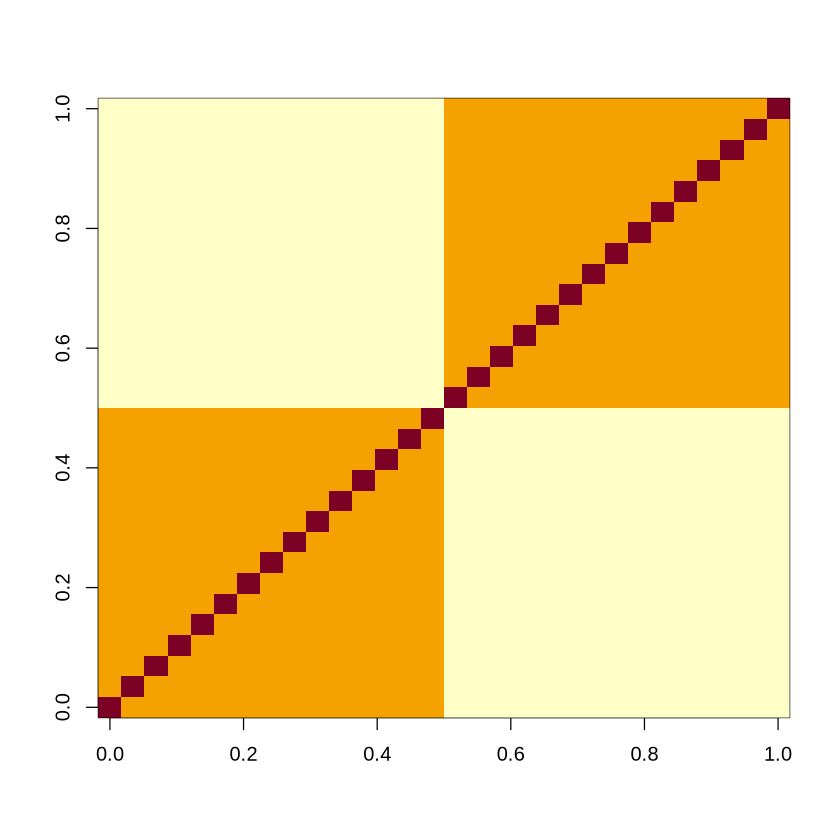

In [2]:
# reading the data and storing it as phenodat

Amat=read.csv("datasets/Amat.csv",header=FALSE)

# Header = FALSE because the file has no header row in it.

#converting to a matrix
Amat=as.matrix(Amat)

#creating a heatmap of the pedigree relationship matrix file

image(Amat)

Here we can see that we have two blocks of highly related (orange color) lines that are from the two full-sib families. The two families are unrelated to each other.

# The Sommer Mixed Model Package

To fit the models we will be using the R package "sommer". There are many mixed model packages available and each have thier own specific syntax for specifying models. We strongly recmomend reading the manual for sommer before using the package (https://cran.r-project.org/web/packages/sommer/sommer.pdf).

The manaul will give you examples of how to specify models and retrieve estimates from the output. For mixed models it is also important to know how to specify (co)variance structures. In this module we will give some examples but sommer is capable of supporting many (co)vairance sturctures that we will not cover here. It is encouraged that after students feel comfortable fitting basic models, they explore fitting more complex models from the sommer quick start guides:

- https://cran.r-project.org/web/packages/sommer/vignettes/v1.sommer.quick.start.pdf
- https://cran.r-project.org/web/packages/sommer/vignettes/v3.sommer.qg.pdf
- https://cran.r-project.org/web/packages/sommer/vignettes/v4.sommer.gxe.pdf
- https://cran.r-project.org/web/packages/sommer/vignettes/v6.sommer.spatial.pdf

# Creating a data frame

The sommer package requires datasets to be in an object called a dataframe. In our case we are reading in the data as a dataframe but we will creat a new data to illustrate how is is done with data htat is in a matrix format.


In [3]:
# creating a data frame from the input data

phenodatdf<-data.frame(block=as.factor(phenodat[,1]),variety=as.factor(phenodat[,2]), phenotype=as.double(phenodat[,3]))

When creating the data frame we name each column in the data set and these are the names we will use when specifying the model

For effects in which we want to estimate values for each level (i.e. block) we use the `as.factor()` command so sommer will know hoe to treat the effect in the model. In the case of block the numbers for each block (1,2,3) are arbitrary and have no relation to the effect of block. The same is true for variety.

For effects in which the numeric value has meaning and we want to fit a regression coefficient, we use the `as.double()` command. We also use the `as.double()` command for the phenotypes we want to model as continuous triats.

# Pedigree Relationships

Now that we have the data frame ready for analysis we need to prepare the pedigree relationship matrix for model 2. To do this we need to mapr the varieties in the dataset to the positions in the relationship matrix, and set an attribute to let the sommer package know if it needs to invert the matrix. To make this easy the variety ids in the datafile correspond directly to the position in the relationship matrix.

To do this we use the commands: `rownames()`, `colnames()`, and `attr()`. In this casse we are going to set the attribute "INVERSE" to FALSE, so sommer knows that the relationship matrix has not been inverted.

In [4]:
rownames(Amat)=levels(phenodatdf$variety)
colnames(Amat)=levels(phenodatdf$variety)

attr(Amat, "INVERSE")=FALSE


# Running the Models

Now that the data is prepared for analysis we can run the models and look at the output.

We will start by loading the sommer package:

In [5]:
library(sommer)

Loading required package: Matrix

Loading required package: MASS

Loading required package: crayon



# Model 1 - Variety as fixed

First we will run a simple model treating variety and block as fixed. The results of the analysis will be stored as "model1_ped"

In [6]:
model1_ped<-mmer(phenotype ~ block + variety,
                 rcov= ~ units,
                 data=phenodatdf, verbose= TRUE)

iteration    LogLik     wall    cpu(sec)   restrained
    1      37.3551   18:28:56      0           0
    2      37.3551   18:28:56      0           0
    3      37.3551   18:28:56      0           0
    4      37.3551   18:28:56      0           0


Before we look at the results, let's break down the model statement

- `mmer()` is the mixed model solver used by sommer. There is also a `mmec()` function for solving mixed models that we will not cover here. For certain types of analysis 'mmec' will run faster.
- The first line of the model statement specifies the phenotype and then the fixed effects "block and variety.
- The second line gives the covariance structure for the residuals `rcov= ~units` is the default structure in which residuals are treated as being identically and indepenedently distributed. When using the default structure this line can be omitted, but there are many ways in which the residual covariance can be modeled and I prefer to always explicitly state the structure I'm using.
- The last line tells sommer which data frame to use and I set the verbose flag to TRUE so the **convergence** information is printed to the screen.

**Convergence** - Mixed models must be solved iteratively as you need estimates of the model effects to estimate variance composnents and you need the variance components to estimate the random effects. This means the solver must start by randomly initializing the variance components and interatively update the solutions until cpnvergence has been achieled. Mixed models do not always converge for a variety of reasons, so it is important to first check for model convergence before using and of the model outputs.

# Model Output

Now lets look at key componente of the model output. First we will use the function `summary()` to look at what is contained in the object **model1_ped**.

In [7]:
summary(model1_ped)

,VarComp,VarCompSE,Zratio,Constraint
,<dbl>,<dbl>,<dbl>,<chr>
units.phenotype-phenotype,80.44305,14.9379,5.385165,Positive
Trait,Effect,Estimate,Std.Error,t.value
<fct>,<fct>,<dbl>,<dbl>,<dbl>
phenotype,(Intercept),104.072383,5.348081,19.4597606
phenotype,block2,40.147884,2.315787,17.3366035
phenotype,block3,-21.961745,2.315787,-9.4834903
phenotype,variety2,4.698410,7.323162,0.6415821
phenotype,variety3,-4.045684,7.323162,-0.5524505
phenotype,variety4,9.295060,7.323162,1.2692687


**$groups** - Provides grouping information for more complicated covariance structures

**$varcomp** - provdes estimates of the variance components, in this case only for the residual variance component as there are no random effects in the model.

**$beta** - provides the estimates and standard errors of the fixed effects

**method** - Gives the method used to solve the mixed model equations `NR` is a second derivative method that will not be covered in this course.

**$logo** - Provides information on model fit and whether the model converged. Here we can see that Converged = TRUE, so we know the model converged successfuly. **Always confirm the model converged before using any results**.  

# Solutions

To pull out spcific components of **model1_ped** we use `$`

The fixed effect solutions can be pulled out of the model object using the command `model1_ped$Beta` 

In [8]:
sol_fixed=model1_ped$Beta
sol_fixed

Trait,Effect,Estimate
<fct>,<fct>,<dbl>
phenotype,(Intercept),104.072383
phenotype,block2,40.147884
phenotype,block3,-21.961745
phenotype,variety2,4.698410
phenotype,variety3,-4.045684
phenotype,variety4,9.295060
phenotype,variety5,-6.264846
phenotype,variety6,-4.819203
phenotype,variety7,1.574979


In the above solutions '(intercept)' is equal to the value of 'variety1' in 'block1', 'block2' and 'block3' are the deviations of the effects of 'blocks 2 and 3' from 'block1', and the estimates of 'variety2 - 30' are deviations from 'variety1'.

To get our estimates for variety we are going to add the average of the block effects to the estimates on the variety effects:

In [9]:
model1_ped_est=rep(0,30) # vector to store variety estimates
block_average = sol_fixed$Estimate[1]/3 + (sol_fixed$Estimate[1] + sol_fixed$Estimate[2])/3 + (sol_fixed$Estimate[1] + sol_fixed$Estimate[3])/3 # averaging the block effects 
model1_ped_est[1] = 0 + block_average # deviation of 'variety1' from 'variety1' is 0
model1_ped_est[2:30]= sol_fixed$Estimate[4:32] + block_average
model1_ped_est

[1] 110.13443 114.83284 106.08875 119.42949 103.86958 105.31523 111.70941
 [8] 105.66327 104.01824 112.50516 111.28327 126.02851 106.88751 123.77012
[15] 113.20596 102.72397  91.86987  95.65800 103.87813  96.65853 101.18698
[22] 101.30591  93.32281 114.62885 102.41324 116.81421 102.02002 104.81963
[29]  95.86131  99.58800

Now I have my estimates from model 1, let's run a second model that treats variety as a random effect and uses the pedigree relationship matrix. 

# Model 2 - Variety as Random

In [10]:
model2_ped <- sommer::mmer(phenotype~block, 
              random= ~ vsr(variety, Gu=Amat),
              rcov= ~ units,
              data=phenodatdf, verbose = TRUE)

iteration    LogLik     wall    cpu(sec)   restrained
    1      44.6105   18:31:46      0           0
    2      45.8325   18:31:46      0           0
    3      45.9284   18:31:46      0           0
    4      45.9312   18:31:46      0           0
    5      45.9312   18:31:46      0           0


As you can see the model statement is similar but we now have a new row for the random effect: `random= ~ vsr(variety, Gu=Amat),`

`random= ~` tells the model that we are giving it terms we want to treat as random.

`vsr()` is a command that we use to specify variance structures

In this case we are using `vsr()` to tell sommer we want to model variety as random with a user defined relationship matrix. `Gu` stands for covariance struture (G) that is user (u) defined.

There are many different ways to construct covariance structures using  kronecker product between matrices and I highly encourage those who are interested to learn more about how to define more complex structures, but that is out of scope for this class.

for more information on the kronecker product see: https://en.wikipedia.org/wiki/Kronecker_product

Now let's sort the data and generate the predictions.

For more complicated mixed models it is easier to use the `predict.mmer()` function. To use the predict.mmer function we need to pull the DTable variable out of the model fit object:

In [11]:
dtm2=model2_ped$Dtable
dtm2

type,term,include,average
<chr>,<chr>,<lgl>,<lgl>
fixed,1,FALSE,FALSE
fixed,block,FALSE,FALSE
random,variety,FALSE,FALSE


The Dtable has one row for each variable in the model. We will modify the 'include' and 'average' columns in the table to indicate which variables we want included in the prediction and for the variables included, whether or not we want them averaged.

For the variable of interest, variety in this case, we will include but not average. We always will include the intercept (denoted as 1 in the first row). In gereral we will always include and average fixed effects that are not of interest for the predictions, this ensures we get the correct standard errors for our predictions.

Now lets modify the `dtm2` to get the predictions we want:

In [12]:
dtm2[1,"include"]=TRUE # intercept
dtm2[2,"include"]=TRUE # block
dtm2[2,"average"]=TRUE # block
dtm2[3,"include"]=TRUE # variety
dtm2

type,term,include,average
<chr>,<chr>,<lgl>,<lgl>
fixed,1,TRUE,FALSE
fixed,block,TRUE,TRUE
random,variety,TRUE,FALSE


In [13]:
aM2_ped=predict.mmer(model2_ped, Dtable= dtm2, D="variety")
#getting the predicted values
summary(aM2_ped)

       Length Class      Mode
pvals    3    data.frame list
D      990    dgCMatrix  S4  
vcov   900    dgeMatrix  S4  
Dtable   6    data.frame list

The object aM2 has the matrices used to calculate the predictions and the standard errors of the predictions; however, we are only interested in the predicted values 'pvals'. Let's pull out the predicted values to compare to the fixed effect models and the true simulated values.

In [14]:
pM2_ped=aM2_ped$pvals
pM2_ped

,variety,predicted.value,std.error
,<chr>,<dbl>,<dbl>
1,1,110.59948,6.344083
2,2,112.87646,6.344083
3,3,108.63882,6.344083
4,4,115.10413,6.344083
5,5,107.56335,6.344083
6,6,108.26395,6.344083
7,7,111.36276,6.344083
8,8,108.43262,6.344083
9,9,107.63539,6.344083


# Comparing Models

Now that we have results fro mthe models let's compare performance.

First let's plot the solutions from model 1 against model 2 to see how similar the results are.

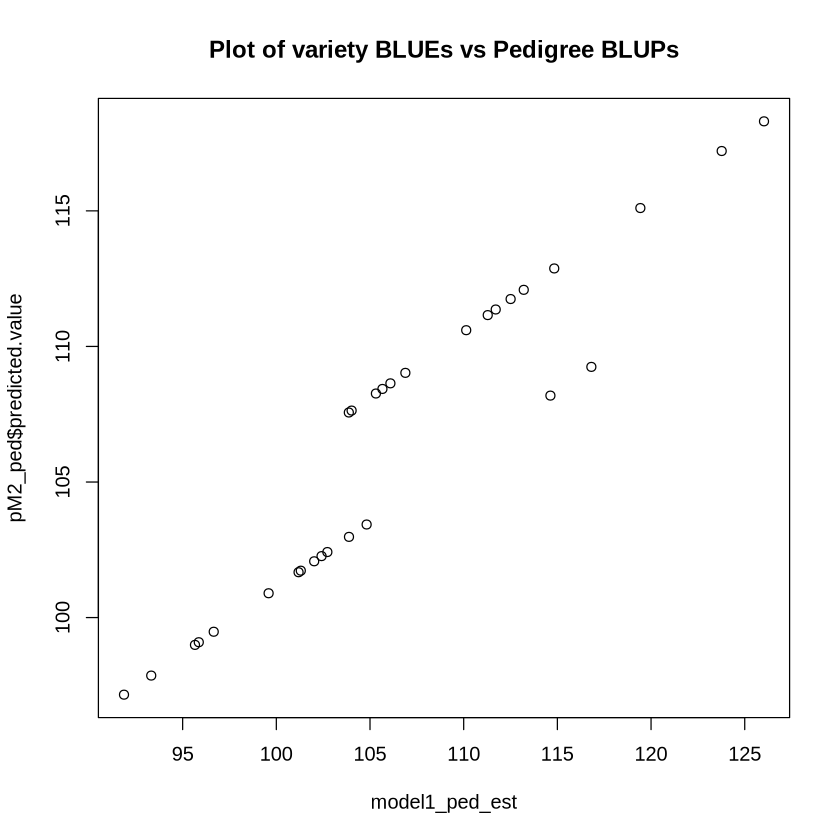

In [15]:
plot(model1_ped_est,pM2_ped$predicted.value, main="Plot of variety BLUEs vs Pedigree BLUPs")

In this plot the BLUPs are on the y-axis and the BLUEs are on the x-axis. An interestng pattern can be clearly seen in the plot. The BLUPs group into two distinct lines. 

# Question: 
Why would the use of the pedigree relationship matrix result in two distinct clusters of Estimate Breeding Vaues?

# Answer:


# Accuracy of the Estimates

To look at the accuracy of the estimates we will correlation the Estimated Breeding values from from model 1 and model 2 with the true breeding values.

First let's pull the true values out of phenodat.

In [16]:
True_EBV=phenodat[1:30,4]

Now let's calculate accuracy by correlating the estimate values from each model with the true values.

In [17]:
print("Correlation of model 1 estimates and True Breeding Values")
print(cor(model1_ped_est,True_EBV))

print("Correlation of model 2 estimates and True Breeding Values")
print(cor(pM2_ped$predicted.value,True_EBV))

[1] "Correlation of model 1 estimates and True Breeding Values"
[1] 0.7663123
[1] "Correlation of model 2 estimates and True Breeding Values"
[1] 0.8504054


As the results show, accounting for the pedigree relationships results in more accurate estimates of the true breeding values. This increase in accuracy would result in an increase in response to selection simply by analyzing the data using a more informative mixed model as opposed to a simple model treating variety as a fixed effect.

# Activity:
Run model 2 without the pedigree relationship matrix (`random= ~ vsr(variety)`). How does that impact the accuracy and change the plots of the solutions for model 1 and model 2? 

iteration    LogLik     wall    cpu(sec)   restrained
    1      39.9805   18:37:14      0           0
    2      41.1033   18:37:14      0           0
    3      41.4123   18:37:14      0           0
    4      41.4404   18:37:14      0           0
    5      41.4407   18:37:14      0           0


type,term,include,average
<chr>,<chr>,<lgl>,<lgl>
fixed,1,FALSE,FALSE
fixed,block,FALSE,FALSE
random,variety,FALSE,FALSE


type,term,include,average
<chr>,<chr>,<lgl>,<lgl>
fixed,1,TRUE,FALSE
fixed,block,TRUE,TRUE
random,variety,TRUE,FALSE


[1] "Correlation of model 2 no ped estimates and True Breeding Values"
[1] 0.7663123


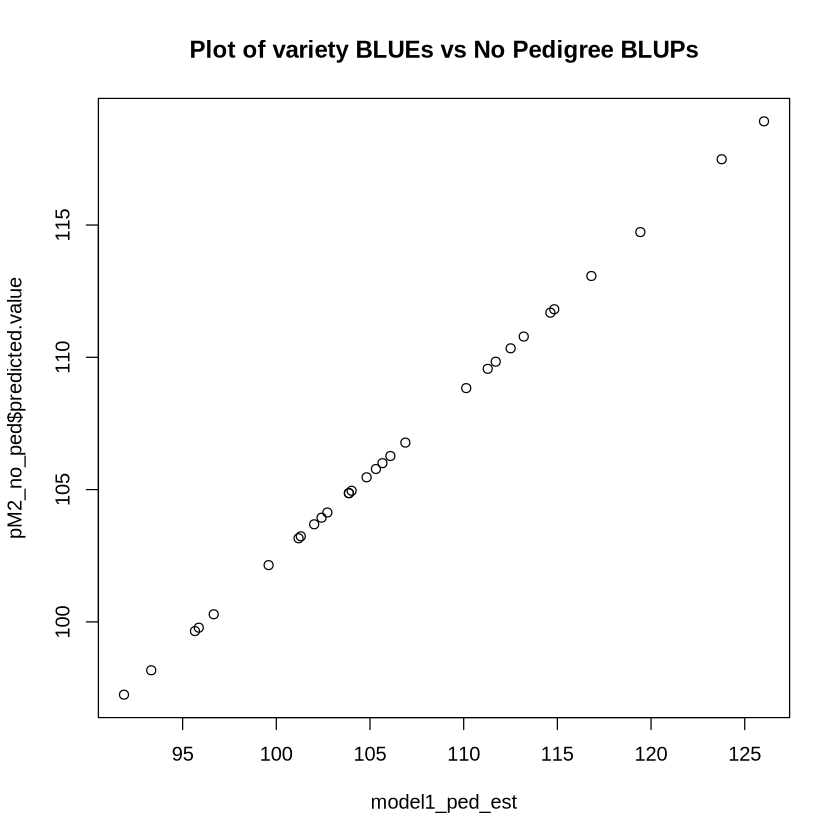

In [18]:
# Model 2 no ped
model2_no_ped <- sommer::mmer(phenotype~block, 
              random= ~ vsr(variety),
              rcov= ~ units,
              data=phenodatdf, verbose = TRUE)

dtm2np=model2_no_ped$Dtable
dtm2np

dtm2np[1,"include"]=TRUE # intercept
dtm2np[2,"include"]=TRUE # block
dtm2np[2,"average"]=TRUE # block
dtm2np[3,"include"]=TRUE # variety
dtm2np

aM2_no_ped=predict.mmer(model2_no_ped, Dtable= dtm2np, D="variety")
#getting the predicted values
pM2_no_ped=aM2_no_ped$pvals

plot(model1_ped_est,pM2_no_ped$predicted.value, main="Plot of variety BLUEs vs No Pedigree BLUPs")

print("Correlation of model 2 no ped estimates and True Breeding Values")
print(cor(pM2_no_ped$predicted.value,True_EBV))


# Answer


# Fitting a GxE Model in sommer
Genotype by environment interactions (GxE) are commonly observed in multi-environmental trials. Mixed models are well suited for analyzing genotype by environment interactions. Here w will use sommoer to fit some simple GxE models using a genomic relationship matrix.

First we will read in the datasets and create a dataframe.

The file "GxE_dataset.csv" contains experimental information and the phenotype of interest.

The file "GE_GRM.csv" contains a genomic relationship matrix. 


In [19]:
#read phenotypic datafaile
phenodat=read.csv("datasets/GxE_dataset.csv",header=TRUE)
# create dataframe to pass to the mixed model software
dataf=data.frame(loc=as.factor(phenodat$Locations),variety=as.factor(phenodat$Variety),phenotype=as.double(phenodat$Phenotype))
#reading in the genomic relationship matrix
snpRelMat=read.csv("datasets/GE_GRM.csv",header=FALSE)

For genomic relationship matrices it is common to add a small value to the diagonal to ensure that the matrix can be inverted

In [20]:
#adding small value to the diagonal
Gsnp=as.matrix(snpRelMat)+diag(.0005,length(snpRelMat[,1]),length(snpRelMat[,1]))

Mapping the rows/columns in the relationship matrix `Gsnp` with the levels of variety in the datafile 

In [21]:
# Map elements in the relationship matrix to the phenotypes
rownames(Gsnp)=levels(dataf$variety)
colnames(Gsnp)=levels(dataf$variety)


Generating a heatmap of the genomic relationships

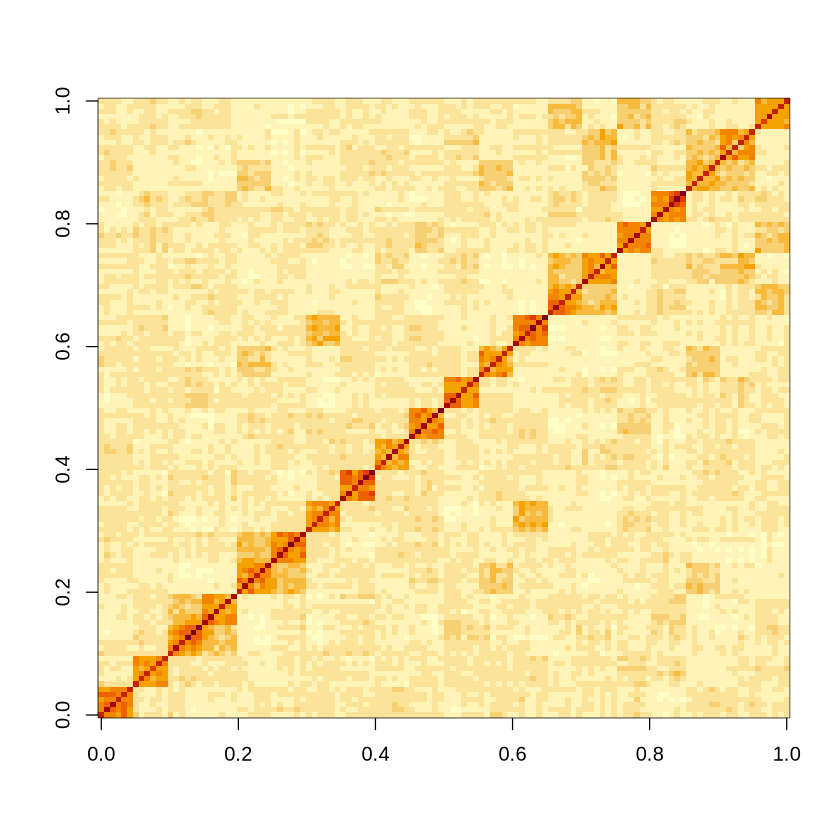

In [22]:
image(Gsnp)

Setting the inverse attribute to FALSE so sommer knows to take the inverse when setting up the mixed model equations

In [ ]:
attr(Gsnp, "INVERSE")=FALSE

Now we will fit 2 different GXE models in sommer, differing based on the specified covariance structure of the genetics effects across environments.

# Model 1 Genomic BLUP (No GxE effect)



In [23]:
#Model 1
mNoGE <- sommer::mmer(phenotype~loc, 
              random= ~ vsr(variety, Gu=Gsnp),
              rcov= ~ units,
              data=dataf, verbose = TRUE)
#Looking at the summary of the results
summary(mNoGE)

iteration    LogLik     wall    cpu(sec)   restrained
    1      -188.417   18:51:45      0           0
    2      -180.874   18:51:45      0           0
    3      -179.704   18:51:45      0           0
    4      -179.628   18:51:45      0           0
    5      -179.628   18:51:45      0           0


===============================================================
           Multivariate Linear Mixed Model fit by REML           
************************  sommer 4.3  ************************ 
===============================================================
         logLik      AIC      BIC Method Converge
Value -179.6279 365.2559 378.9936     NR     TRUE
===============================================================
Variance-Covariance components:
                              VarComp VarCompSE Zratio Constraint
u:variety.phenotype-phenotype   1.178    0.2484  4.743   Positive
units.phenotype-phenotype       2.209    0.1265 17.472   Positive
===============================================================
Fixed effects:
      Trait      Effect Estimate Std.Error t.value
1 phenotype (Intercept)  -0.4227   0.09597  -4.404
2 phenotype        loc2   0.8818   0.13569   6.499
3 phenotype        loc3   2.2688   0.13569  16.720
===============================================================
Groups and observations:
          phenotype
u:variety       120
===============================================================
Use the '$' sign to access results and parameters

Now we will generate the GBLUPs using the predict.mmer function

Setting up the Dtable:

In [24]:
dtNoGE=mNoGE$Dtable
dtNoGE

type,term,include,average
<chr>,<chr>,<lgl>,<lgl>
fixed,1,FALSE,FALSE
fixed,loc,FALSE,FALSE
random,variety,FALSE,FALSE


In [25]:
dtNoGE[1,"include"]=TRUE # intercept
dtNoGE[2,"include"]=TRUE # loc
dtNoGE[2,"average"]=TRUE # loc
dtNoGE[3,"include"]=TRUE # variety
dtNoGE

type,term,include,average
<chr>,<chr>,<lgl>,<lgl>
fixed,1,TRUE,FALSE
fixed,loc,TRUE,TRUE
random,variety,TRUE,FALSE


Generating GBLUPs using predict.mmer:

In [26]:
#Using the predict function to get the estimates of each variety
aNoGE=sommer::predict.mmer(mNoGE,Dtable=dtNoGE,D = "variety")
pNoGE=aNoGE$pvals
pNoGE

,variety,predicted.value,std.error
,<chr>,<dbl>,<dbl>
1,1,0.073053088,1.168132
2,2,-0.805670377,1.166251
3,3,-0.146815902,1.180544
4,4,1.227832873,1.147038
5,5,0.110719019,1.181896
6,6,1.276417975,1.140773
7,7,0.328829292,1.165667
8,8,-0.339347179,1.108285
9,9,0.115611603,1.162425


To estimate accuracy and compare to other models we will be correlating estimates of this model with the true GxE effects. To do this we will assign the same estimate for variety for each of the 3 locations and create a vector that has each GBLUP repeated 3 times.

We will do this using for loops.

First we allocate a vector of length 360 to store 3 GBLUPs for each of the 120 varities

In [27]:
pNoGE360=rep(0,360)

Now we use nested for loops to assign values to the vector `pNoGE360` in the disired order:

In [28]:
count=1 # counter to track the position in pNoGE360
for(i in c(1:120)){ # for loop to cycle through the 120 GBLUP estimates in pNoGE
  
    for (j in c(1:3)){ # for loop to move 3 position in the vector pNoGE360 to duplicate GBLUPs
      
        pNoGE360[count]= pNoGE$predicted.value[i]
       count=count+1 # adding 1 to the counter to move to the next position 
    } # closing for loop to move 3 position in the vector pNoGE360 to duplicate GBLUPs

} # closing for loop to cycle through the 120 GBLUP estimates in pNoGE
pNoGE360=as.double(pNoGE360)
head(pNoGE360) # looking at the first positions in the vector

[1]  0.07305309  0.07305309  0.07305309 -0.80567038 -0.80567038 -0.80567038

# Model 2 Compound Symetric (no genomic relationship matrix)

In [30]:
#Model 2
mgeCS <- sommer::mmer(phenotype~loc,
              random= ~ vsr(variety) + vsr(loc:variety),
              rcov= ~ units,
              data=dataf, verbose = TRUE)
#Looking at the summary of the results
summary(mgeCS)

iteration    LogLik     wall    cpu(sec)   restrained
    1      -214.791   19:7:55      0           0
    2      -203.656   19:7:55      0           0
    3      -201.249   19:7:55      0           0
    4      -201.056   19:7:56      1           0
    5      -201.055   19:7:56      1           0
    6      -201.054   19:7:56      1           0


===================================================================
             Multivariate Linear Mixed Model fit by REML             
**************************  sommer 4.3  ************************** 
===================================================================
         logLik     AIC      BIC Method Converge
Value -201.0545 408.109 421.8467     NR     TRUE
===================================================================
Variance-Covariance components:
                                  VarComp VarCompSE Zratio Constraint
u:variety.phenotype-phenotype      1.2086    0.2177  5.551   Positive
u:loc:variety.phenotype-phenotype  0.3668    0.1410  2.603   Positive
units.phenotype-phenotype          1.9171    0.1429 13.416   Positive
===================================================================
Fixed effects:
      Trait      Effect Estimate Std.Error t.value
1 phenotype (Intercept)  -0.4227    0.1453  -2.909
2 phenotype        loc2   0.8818    0.1486   5.933
3 phenotype        loc3   2.2688    0.1486  15.265
===================================================================
Groups and observations:
              phenotype
u:variety           120
u:loc:variety       360
===================================================================
Use the '$' sign to access results and parameters

Looking at `$varcomp` we can see there is significant GxE variance (.3668) indicating the presence of GxE. 

No let's use the predict function to get GBLUPs for each location.

First we modify the Dtable:

In [31]:
dtCS=mgeCS$Dtable
dtCS
dtCS[1,"include"]=TRUE # intercept
dtCS[2,"include"]=TRUE # loc
dtCS[2,"average"]=TRUE # loc
dtCS[3,"include"]=TRUE # variety
dtCS[4,"include"]=TRUE # loc:variety
dtCS

type,term,include,average
<chr>,<chr>,<lgl>,<lgl>
fixed,1,FALSE,FALSE
fixed,loc,FALSE,FALSE
random,variety,FALSE,FALSE
random,loc:variety,FALSE,FALSE


type,term,include,average
<chr>,<chr>,<lgl>,<lgl>
fixed,1,TRUE,FALSE
fixed,loc,TRUE,TRUE
random,variety,TRUE,FALSE
random,loc:variety,TRUE,FALSE


Now we generate the predictions:

In [32]:
aCS=sommer::predict.mmer(mgeCS, Dtable=dtCS, D="loc:variety")
pCS=aCS$pvals
pCS

,loc:variety,predicted.value,std.error
,<chr>,<dbl>,<dbl>
loc1:variety1,loc1:variety1,-1.26595072,1.486527
loc2:variety1,loc2:variety1,-0.79431948,1.484668
loc3:variety1,loc3:variety1,-0.38043359,1.484668
loc1:variety2,loc1:variety2,-2.29484733,1.486527
loc2:variety2,loc2:variety2,-1.89284094,1.484668
loc3:variety2,loc3:variety2,-1.07583529,1.484668
loc1:variety3,loc1:variety3,-0.97800173,1.486527
loc2:variety3,loc2:variety3,-0.70255486,1.484668
loc3:variety3,loc3:variety3,-0.42512143,1.484668


For the purposes of calculating the accuracy of the two different models we will use the ture values from the input file "TrueValues.csv".

In [33]:
trueGE=read.csv("datasets/TrueValues.csv",header=TRUE)
head(trueGE)

,Loc,Variety,TrueGE
,<int>,<int>,<dbl>
1,1,1,-0.56891875
2,2,1,0.48991525
3,3,1,1.97575859
4,1,2,-1.53729728
5,2,2,-0.86216147
6,3,2,0.08524489


In [34]:
#Printing out the correlations
print("correlation of preditions from model 1 (no GxE) with true values")
print(cor(pNoGE360,trueGE$TrueGE))
print("correlation of GxE preditions")
print(cor(pCS$predicted.value,trueGE$TrueGE))

[1] "correlation of preditions from model 1 (no GxE) with true values"
[1] 0.6720577
[1] "correlation of GxE preditions"
[1] 0.8501959


# Random and Fixed Effects
When to treat something as a random effect?

The decisiosn to treat something as random or fixed in a model is not always clear, but will depend on several factors:

**What is the purpose of the analysis, and what will the estimates be used for?**
* When conducting hypothesis testing it is often best to treat the effects of interest as fixed to facilitate the use of standard statistical tests (i.e. t-test)
* When using the estimates to for ranking (i.e. select the top 10% of all varieties to advance) treating the effect as random can improve accuracy as we have seen in the examples used in this course.

**Do you think prior knowledge on the the statistical distribution will improve accuracy?**
* We have seen in this course that the use of prior knowledge relating to genetic relatedness can improve accuracy.
* The degree to which knowledge of the statistical distribution of a variable will impact the accuracy of estimates depends on the amount of data we have. When estimating the genetic performance of a variety with 100 plots of data, the impact of the prior knowledge of the distribution would be less than if we only had 2 plots of data.
* Think of prior iformation on statistical distributions as a suppliment to observed phenotypic data. The less phenotypic data available, on a specific variety for instance, the more the prior knowledge of the statistical distributoin will impact the estimates.

**Is there enough information to accurately estimate the paramerters of the the statistical distribution?**
* For effects of interest it is important to have reliable estimates of variance and covariance components for the associated statistical distributions. 
* If I have an experiment with only two environments, I shouldn't expect to get a good variance component estimate for the distribution of environmental effects. In this case it is probably best treat this effect as fixed assuming you have no prior knowledge of the true value of the variance component and have enough data to estimate as a fixed effect.


# Final Activity
Insert new code cells in the notebook and modify the code for the compound symetric model to include the genomic relationship matrix for the main effect.

Use the predict function to get the GBLUPs and compare the results to model 1 (no GxE) and model 2 (compound symetric with no genomic relationship matrix). **Which model was most accurate? (use model output and correlations with true values to justify your answer**

In [ ]:
#Model 2
mgeCSwGRM <- sommer::mmer(phenotype~loc,
              random= ~ ,
              rcov= ~ units,
              data=dataf, verbose = TRUE)
#Look at the summary of the results


#Generate predictions using the Dtable



#Calculate correlations for all model
print("correlation of predictions from model 1 (no GxE) with true values")
print()
print("correlation of GxE predictions")
print()
print("correlation of GxE predictions with GRM")
print()



# Answer
